In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

from cana.boolean_node import *
from cana.boolean_network import *

from utils import *
from modules import *
from mean_field_computations import *
from brute_force_computations import *
from simulations import *
from entropy_computations import *
from driver_sets import *

In [2]:
N=BooleanNetwork.from_file('../models/CORTICAL-AREA-DEVELOPMENT.cana',file_type='logical')

In [37]:
print N
for n in N.nodes:
    print n

<BNetwork(Name='', N=5, Nodes=['v_Coup_fti', 'v_Emx2', 'v_Fgf8', 'v_Pax6', 'v_Sp8'])>
<BNode(name='v_Coup_fti', k=2, inputs=[v_Fgf8,v_Sp8], state=0, outputs='[1,0,0,0]' constant=False)>
<BNode(name='v_Emx2', k=4, inputs=[v_Coup_fti,v_Fgf8,v_Pax6,v_Sp8], state=0, outputs='[0,0,0,0...0,0,0,0]' constant=False)>
<BNode(name='v_Fgf8', k=3, inputs=[v_Emx2,v_Fgf8,v_Sp8], state=0, outputs='[0,0,0,1,0,0,0,0]' constant=False)>
<BNode(name='v_Pax6', k=3, inputs=[v_Coup_fti,v_Emx2,v_Sp8], state=0, outputs='[0,1,0,0,0,0,0,0]' constant=False)>
<BNode(name='v_Sp8', k=2, inputs=[v_Emx2,v_Fgf8], state=0, outputs='[0,1,0,0]' constant=False)>


In [41]:
N_v2 = N
print 'before', N_v2.nodes[4]
N_v2.nodes[4].outputs = [1, 1, 0, 1] # change & to |
print 'after', N_v2.nodes[4]

before <BNode(name='v_Sp8', k=2, inputs=[v_Emx2,v_Fgf8], state=0, outputs='[0,1,0,0]' constant=False)>
after <BNode(name='v_Sp8', k=2, inputs=[v_Emx2,v_Fgf8], state=0, outputs='[1,1,0,1]' constant=False)>


In [42]:
dd={node.name: LUT_reduce(look_up_table(node)) for node in N.nodes}
sunits,sunit_map=get_sunits(N)
rsunit_map = reverse_sunit_map(sunit_map)

dd_v2={node.name: LUT_reduce(look_up_table(node)) for node in N_v2.nodes}
sunits_v2,sunit_map_v2=get_sunits(N_v2)
rsunit_map_v2 = reverse_sunit_map(sunit_map_v2)

In [4]:
def run_IBMFA(N, iterations, update, act_nodes=set(), inh_nodes=set()):
    assert update in 'AS'
    act_prob = {i: {node.name: (1 if node.name in act_nodes else 0 if node.name in inh_nodes else 0.5)
                    for node in N.nodes}
                for i in range(iterations+1)}
    if update == 'S':
        synchronous_mf(N,act_nodes=act_nodes | inh_nodes,act_prob=act_prob,iterations=iterations,pinning=set(),
                       reduced=True,ds=dd,pin_start=True)
    else:
        asynchronous_mf(N,act_nodes=act_nodes | inh_nodes,act_prob=act_prob,iterations=iterations,pinning=set(),
                        reduced=True,ds=dd,pin_start=True,order=None,regenerate=False,oh=False)
    return act_prob

In [5]:
def plot_IBMFA(probs):
    for node in N.nodes:
        plt.plot(range(len(probs)), [probs[i][node.name] for i in range(len(probs))], label=node.name)
    plt.legend(bbox_to_anchor=(1.0, 0.95), fontsize=14)
    plt.show()

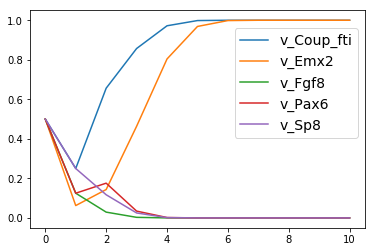

{0: {'v_Coup_fti': 0.5,
  'v_Emx2': 0.5,
  'v_Fgf8': 0.5,
  'v_Pax6': 0.5,
  'v_Sp8': 0.5},
 1: {'v_Coup_fti': 0.25,
  'v_Emx2': 0.0625,
  'v_Fgf8': 0.125,
  'v_Pax6': 0.125,
  'v_Sp8': 0.25},
 2: {'v_Coup_fti': 0.65625,
  'v_Emx2': 0.1435546875,
  'v_Fgf8': 0.029296875,
  'v_Pax6': 0.17578125,
  'v_Sp8': 0.1171875},
 3: {'v_Coup_fti': 0.8569488525390625,
  'v_Emx2': 0.4635181110352278,
  'v_Fgf8': 0.0029403716325759888,
  'v_Pax6': 0.0345003604888916,
  'v_Sp8': 0.025091171264648438},
 4: {'v_Coup_fti': 0.9720422344709903,
  'v_Emx2': 0.8042520056936024,
  'v_Fgf8': 3.958022186266003e-05,
  'v_Pax6': 0.001925605624637204,
  'v_Sp8': 0.0015774561277027976},
 5: {'v_Coup_fti': 0.9983830260864981,
  'v_Emx2': 0.9686017241441988,
  'v_Fgf8': 1.222173420507408e-08,
  'v_Pax6': 8.632907123385583e-06,
  'v_Sp8': 7.747749043817927e-06},
 6: {'v_Coup_fti': 0.9999922400293167,
  'v_Emx2': 0.99836665978243,
  'v_Fgf8': 2.9731319255196352e-15,
  'v_Pax6': 3.9335471417542615e-10,
  'v_Sp8': 3.8374

In [16]:
probs = run_IBMFA(N, 10, 'S')
plot_IBMFA(probs)
probs

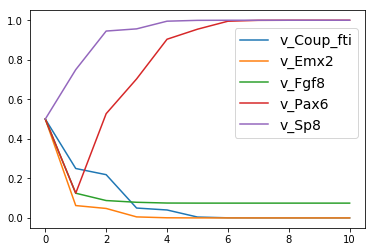

{0: {'v_Coup_fti': 0.5,
  'v_Emx2': 0.5,
  'v_Fgf8': 0.5,
  'v_Pax6': 0.5,
  'v_Sp8': 0.5},
 1: {'v_Coup_fti': 0.25,
  'v_Emx2': 0.0625,
  'v_Fgf8': 0.125,
  'v_Pax6': 0.125,
  'v_Sp8': 0.75},
 2: {'v_Coup_fti': 0.21875,
  'v_Emx2': 0.0478515625,
  'v_Fgf8': 0.087890625,
  'v_Pax6': 0.52734375,
  'v_Sp8': 0.9453125},
 3: {'v_Coup_fti': 0.0498809814453125,
  'v_Emx2': 0.005157371982932091,
  'v_Fgf8': 0.07910840213298798,
  'v_Pax6': 0.7031857967376709,
  'v_Sp8': 0.9563541412353516},
 4: {'v_Coup_fti': 0.04019310461805503,
  'v_Emx2': 0.0005950743386025588,
  'v_Fgf8': 0.07526546366711896,
  'v_Pax6': 0.9039640106780341,
  'v_Sp8': 0.9952506194738431},
 5: {'v_Coup_fti': 0.004391916198724135,
  'v_Emx2': 1.695272874187247e-05,
  'v_Fgf8': 0.07486342351152307,
  'v_Pax6': 0.9546799633900287,
  'v_Sp8': 0.9994497142074088},
 6: {'v_Coup_fti': 0.0005090895142480696,
  'v_Emx2': 1.0133009476060111e-07,
  'v_Fgf8': 0.0748209587922578,
  'v_Pax6': 0.9950433458318674,
  'v_Sp8': 0.99998431641

In [43]:
probs = run_IBMFA(N_v2, 10, 'S')
plot_IBMFA(probs)
probs

In [8]:
attractors = attractors_to_dict(N)
attractors

{'00111': {'v_Coup_fti-0', 'v_Emx2-0', 'v_Fgf8-1', 'v_Pax6-1', 'v_Sp8-1'},
 '11000': {'v_Coup_fti-1', 'v_Emx2-1', 'v_Fgf8-0', 'v_Pax6-0', 'v_Sp8-0'}}

In [45]:
attractors_v2 = attractors_to_dict(N_v2)
attractors_v2

{'00111': {'v_Coup_fti-0', 'v_Emx2-0', 'v_Fgf8-1', 'v_Pax6-1', 'v_Sp8-1'},
 '11000': {'v_Coup_fti-1', 'v_Emx2-1', 'v_Fgf8-0', 'v_Pax6-0', 'v_Sp8-0'}}

In [20]:
def driver_to_attractor(N, sunits, sunit_map, dd, attractor, attractors, iterations=10):
    start_time = time.time()

    modules,translator=find_modules(N,1,sunits,sunit_map,modules={},translator={},
                    seeds=None, reduced=True,ds=dd,
                    pinning={},iterations=iterations,data=True,pin_start=True,
                    update='synchronous',regenerate=False,models=1)

    selections, entropies=top_selection(N,sunits,sunit_map,modules,translator,seeds=None,max_s=10,
                                        top=1,reduced=True,ds=dd,iterations=iterations,t=iterations,
                                        attractor=attractor,attractors=attractors,
                                        force=False,pin_start=True,update='synchronous',regenerate=False,
                                        drivers=True)

    for seed in selections:
        print(seed, entropies[seed], to_list(seed,sunit_map,translator))

    driver = reduce_selection(selections[-1],N,sunits,sunit_map,modules,translator,reduced=True,ds=dd,
                              t=iterations) #reduce the final selection

    print driver
    print "--- Total time: %s seconds ---" % (time.time() - start_time)

In [27]:
driver_to_attractor(N, sunits, sunit_map, dd, '00111', attractors, iterations=5)

seeds: 10
('()', 0.04379628085291985, [])
('(5,)', 0.0, ['v_Fgf8-1'])
(5,)
--- Total time: 0.246594905853 seconds ---


In [46]:
driver_to_attractor(N_v2, sunits_v2, sunit_map_v2, dd_v2, '00111', attractors_v2, iterations=5)

seeds: 10
('()', 0.13955006324260735, [])
('(5,)', 0.0, ['v_Fgf8-1'])
(5,)
--- Total time: 0.277548074722 seconds ---


In [26]:
driver_to_attractor(N, sunits, sunit_map, dd, None, None, iterations=5)

seeds: 10
('()', 0.04379628085291985, [])
('(8,)', 0.0, ['v_Sp8-0'])
(8,)
--- Total time: 0.272583007812 seconds ---


In [47]:
driver_to_attractor(N_v2, sunits_v2, sunit_map_v2, dd_v2, None, None, iterations=5)

seeds: 10
('()', 0.13955006324260735, [])
('(8,)', 0.0, ['v_Sp8-0'])
(8,)
--- Total time: 0.248186826706 seconds ---
